# Data Import
Let's import the dataset for the purpose of doing some exploratory data analysis to understand the relationship amongst the various variables.

In [1]:
#EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


train_data= pd.read_csv("C:\\Users\\Ankita & Subhash\\Desktop\\MSITM\\Fall Semester 2018\\Machine Learning\\Project\\Data From Competition Website\\train_values.csv")

In [2]:
#Brief overview of Dataset
train_data.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


# Exploring Values in Dataset
Let's check if we have any Null or missing values in our dataset. Looks like we don't have any null or missing values in our dataset.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
heart_disease_present                   180 non-null int64
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes

In [5]:
#Summarize
train_data.describe().transpose() #Include df.describe(include='all')

,count,mean,std,min,25%,50%,75%,max
heart_disease_present,180.0,0.444444,0.498290,0.0,0.00,0.0,1.00,1.0
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0


In [7]:
# Overview of all the Data Variables
pandas_profiling.ProfileReport(train_data)

Number of variables,15
Number of observations,180
Total Missing (%),0.0%
Total size in memory,21.2 KiB
Average record size in memory,120.4 B
Numeric,9
Categorical,1
Boolean,4
Date,0
Text (Unique),1
Rejected,0


# Relationship between Variables
The relationships between different variables can be visualized using the namespace plot from matplotlib. The scatter plot is used for visualizing relationships between two numerical variables, and the box plot is used for visualizing relationships between one numerical variable and one categorical variable. The complex conditional plot will be used to visualize many variables in a single visualization.

From the Correlation Heatmap as shown above it gives an idea of the relationship amongst the various continous and categorical variables.

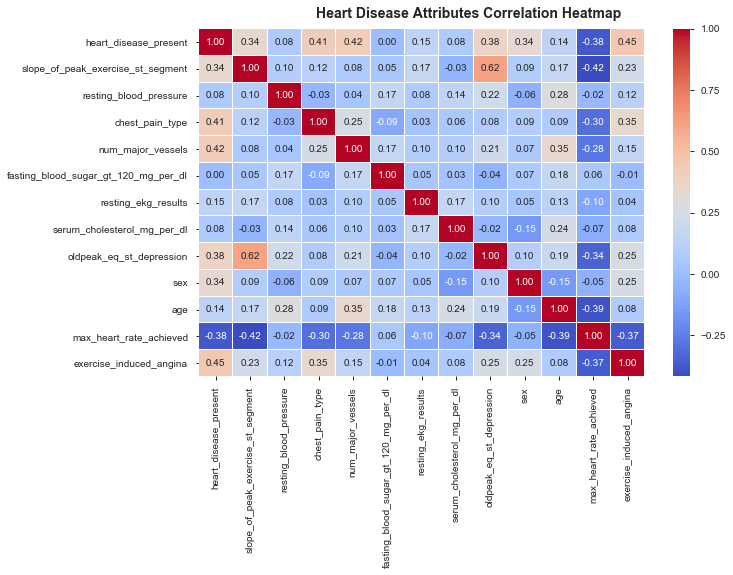

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sns.pairplot(train_data)
corr = train_data.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Heart Disease Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')
plt.figure()
plt.show()

# Visualize Pairwise Relationship 
This pairplot gives an overview of the various relationships for each pairs of columns within our dataframe. As it can be seen the Histograms Distributions are from the numeric variables. The Scatterplots gives an idea of the various Categorical Variables as well as the relationship between two Numeric Variables.

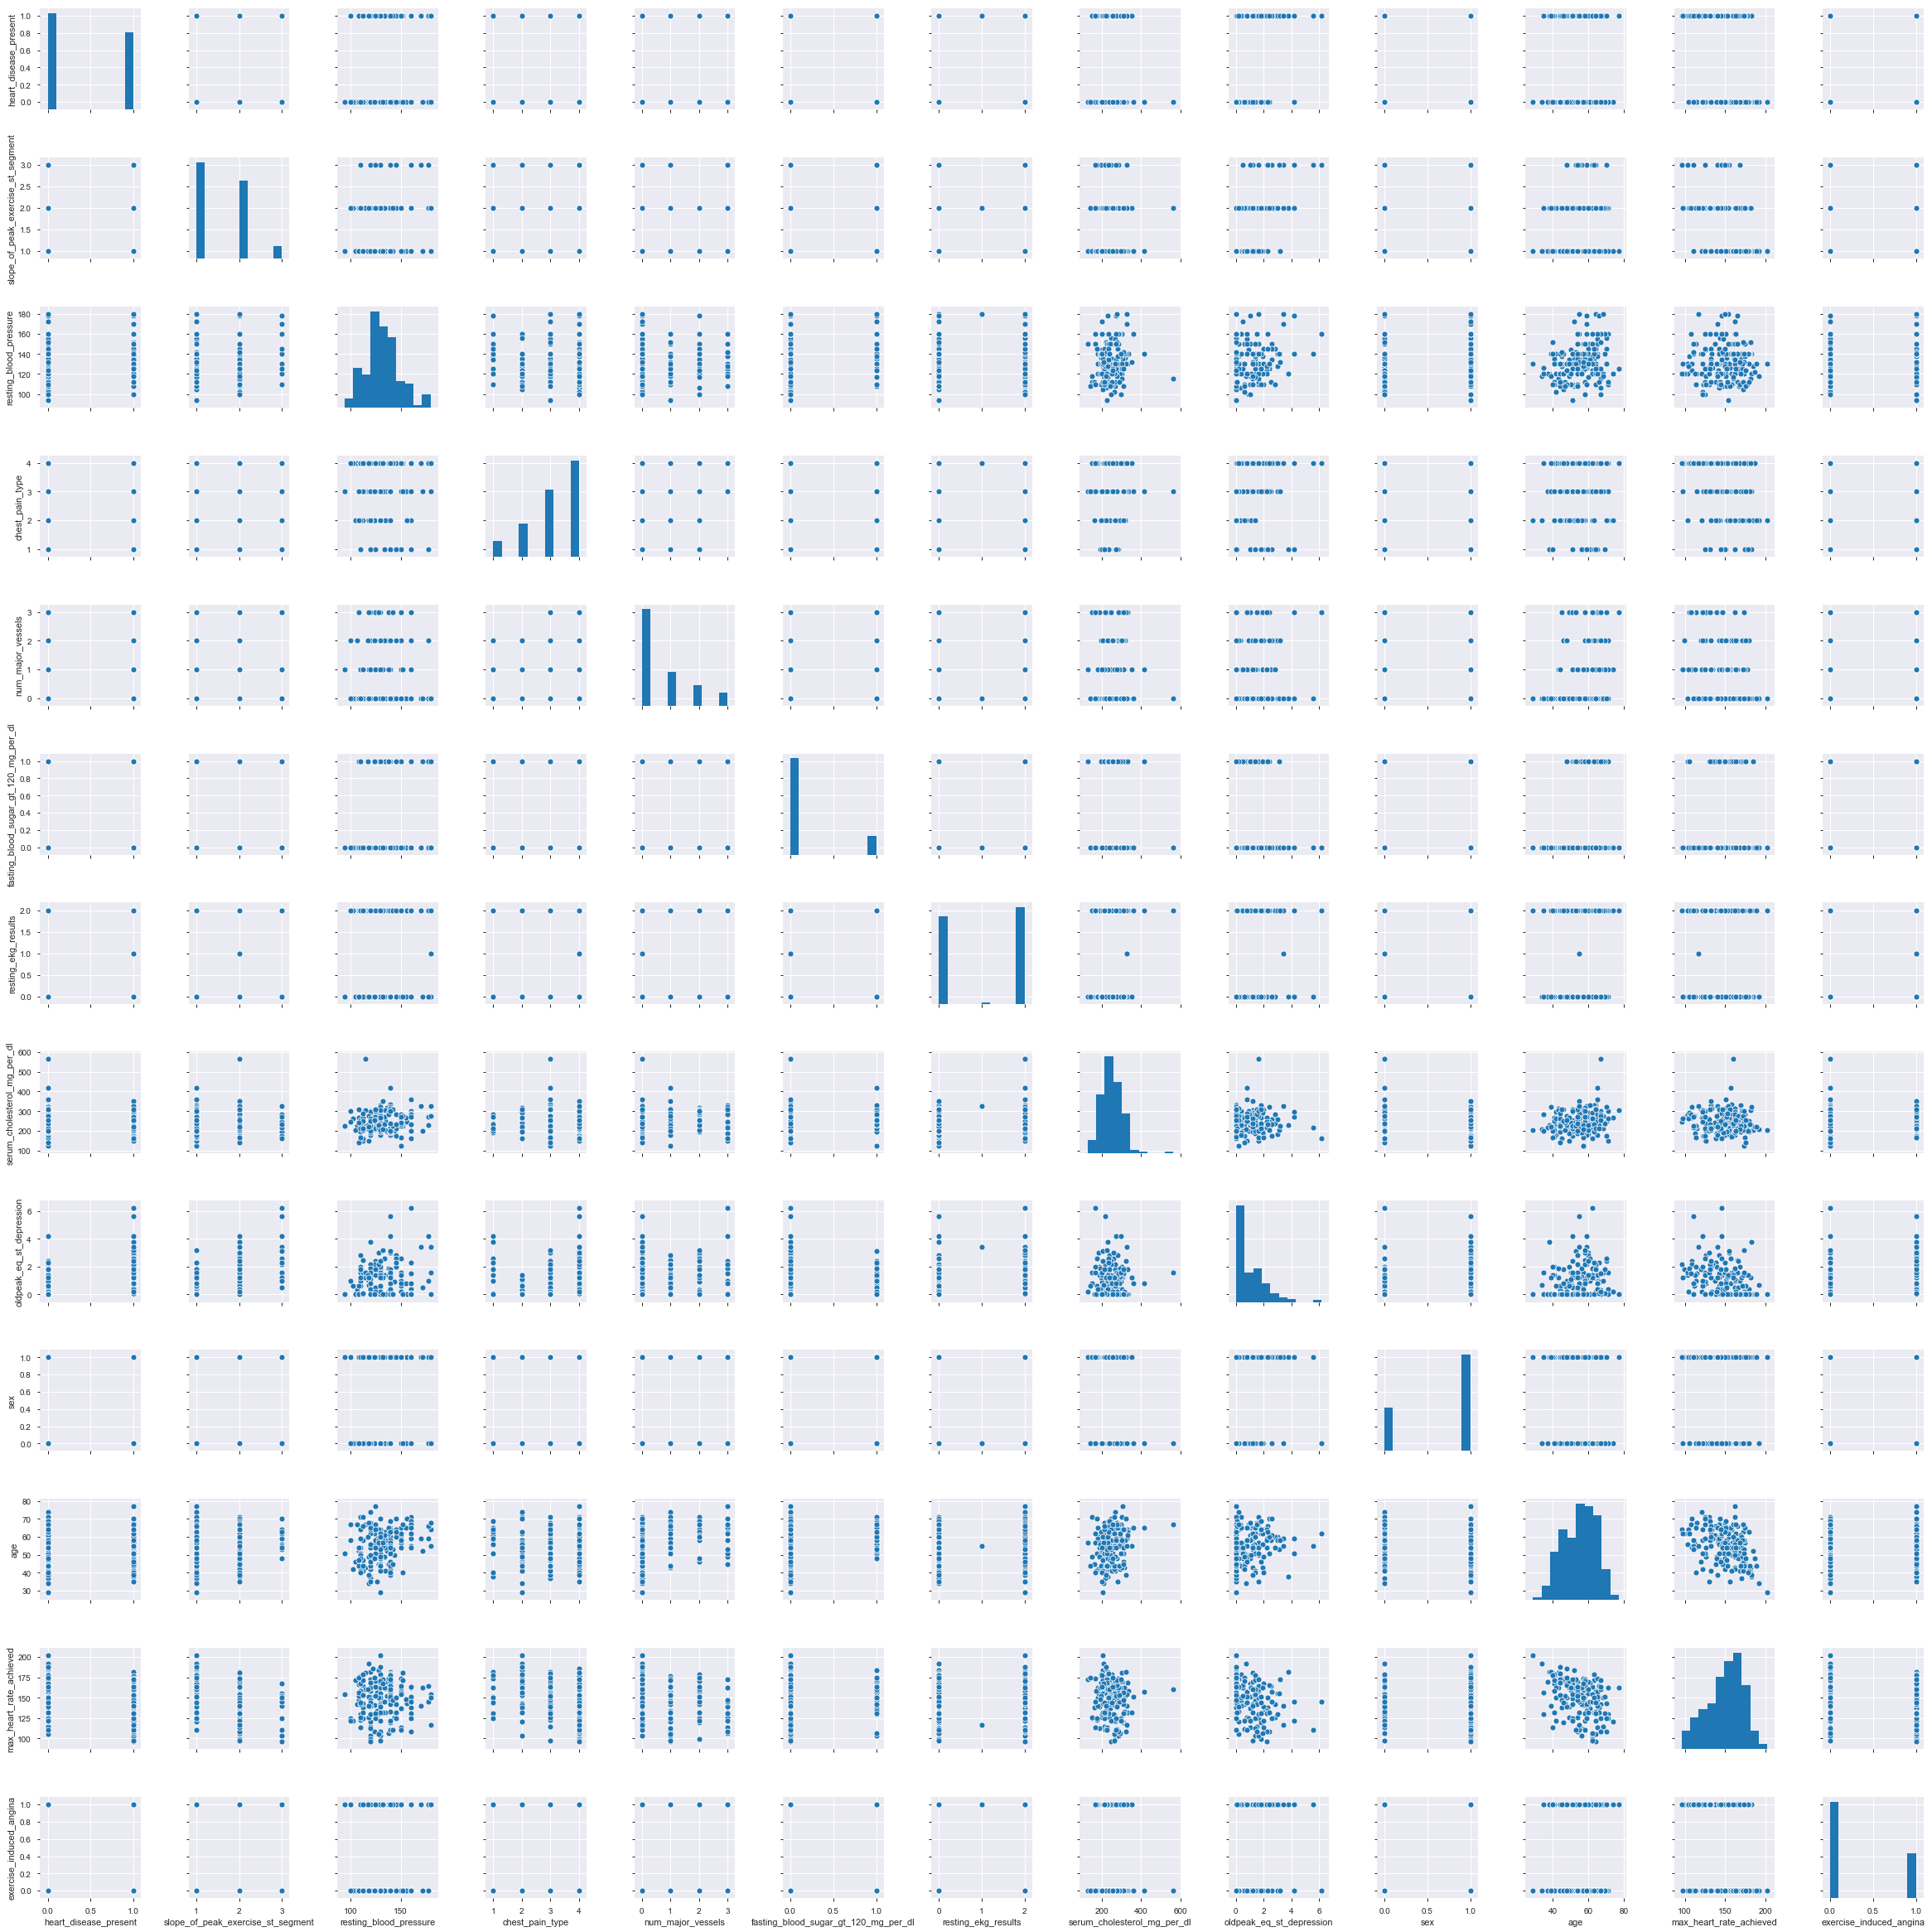

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data)
plt.figure()
plt.show()

# Pairplot
From the pairplot of the whole data we got an idea of the various variables and their respective features. Let's try to plot some of the numerical variables in another pairplot and try to get an idea of the various relationshsips amongst them.

Text(0.5,0.98,'Heart Disease Attributes Pairwise Plots')

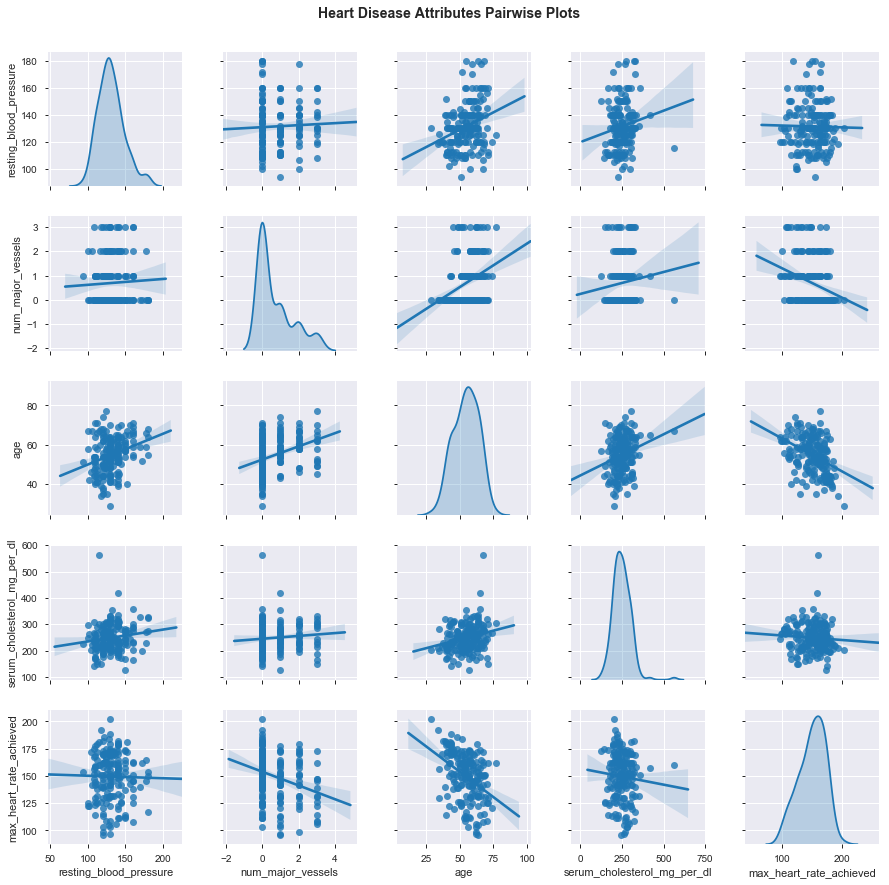

In [11]:
#Pairplot for just numerical variables
# Attributes of interest
plt.rcParams.update({'figure.max_open_warning': 0})
cols = ['resting_blood_pressure', 
        'num_major_vessels', 
        'age', 
        'serum_cholesterol_mg_per_dl', 
        'max_heart_rate_achieved']


pp = sns.pairplot(train_data[cols],palette="Set3",
                  diag_kws=dict(shade=True),
                  diag_kind="kde", # use "kde" for diagonal plots
                  kind="reg")

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Heart Disease Attributes Pairwise Plots', fontsize=14, fontweight='bold')



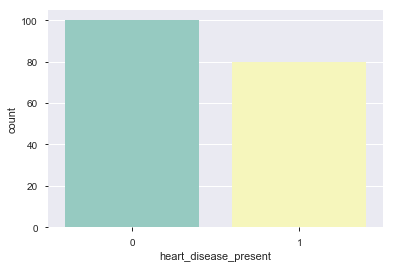

In [12]:
ax = sns.countplot(x='heart_disease_present', data = train_data, palette="Set3")
plt.figure()
plt.show()

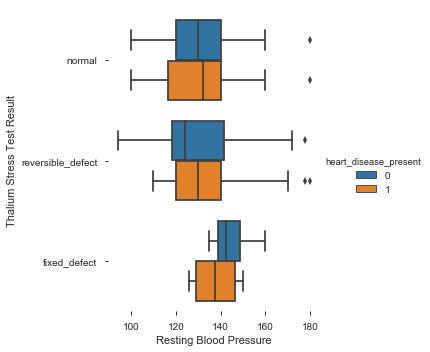

In [13]:
with sns.axes_style(style='ticks'):
     g = sns.catplot(x="resting_blood_pressure", y="thal",hue="heart_disease_present",kind="box", data=train_data)
     g.set_axis_labels("Resting Blood Pressure", "Thalium Stress Test Result" );

# Variable Conversion
Let's try to convert the binary variables indicating Heart Disease present or not in terms of Categorical Variable for ease of further analysis. Since, 0 indicates Heart Disease Not Present and 1 indicates Heart Disease Present, let's convert the Binary Variable to Categorical Variable so that we can perform some more Exploratory Data Analysis. 

In [14]:
#Heart Disease Present Conversion
train_data['heart_disease_present'] = train_data['heart_disease_present'].apply(lambda value: ('Heart Disease Present' if value > 0 else 'Heart Disease Not Present'))
train_data['heart_disease_present'] = pd.Categorical(train_data['heart_disease_present'], categories=['Heart Disease Present', 'Heart Disease Not Present'])




Okay, so looks like we have successfully converted the Binary Variable to Categorical Variable indicating conspicously the presence or the absence of the heart disease, as it can be seen from the sample of our dataframe below. 

In [15]:
train_data.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,Heart Disease Not Present,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,Heart Disease Not Present,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,Heart Disease Present,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,Heart Disease Present,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,Heart Disease Not Present,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


# Exploratory Data Analysis
Okay, so now that we have converted our Binary Data to a Categorical Variable. Let's try to see the relationships amongst the various other variables. 

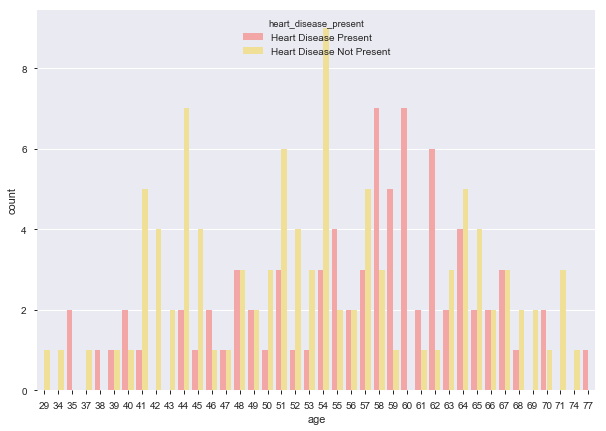

In [16]:
#Stacked Bar Plot
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=train_data, 
                   x="age", 
                   hue="heart_disease_present", 
                   palette={"Heart Disease Present": "#FF9999", "Heart Disease Not Present": "#FFE888"})
plt.figure()
plt.show()

From our above Stacked Bar Plot, as it can be seen that the data distribution looks like somewhat normally distributed. But we can't say that for sure since the data is a little happazardly distributed. Let's try, *Density Plot* to see if we can comprehend and establish any relationship between age and heart disease. 

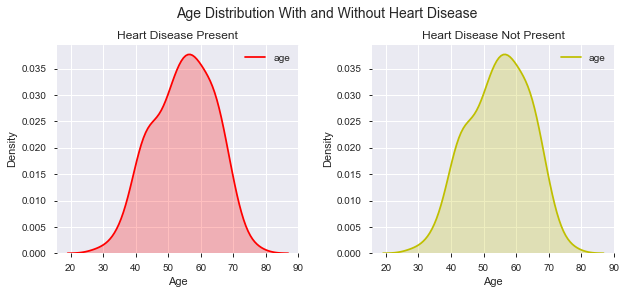

In [17]:
# Density Plot
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Age Distribution With and Without Heart Disease", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Heart Disease Present")
ax1.set_xlabel("Age")
ax1.set_ylabel("Density") 
sns.kdeplot(train_data['age'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Heart Disease Not Present")
ax2.set_xlabel("Age")
ax2.set_ylabel("Density") 
sns.kdeplot(train_data['age'], ax=ax2, shade=True, color='y')

Okay, so looks like Density Plot failed to depict any valid relationship between age and presence of Heart Disease, probably due to the fact that the data is not sufficient to show any variation in the density. So, let's try to see if Histogram could show us the distribution of heart disease over age. 

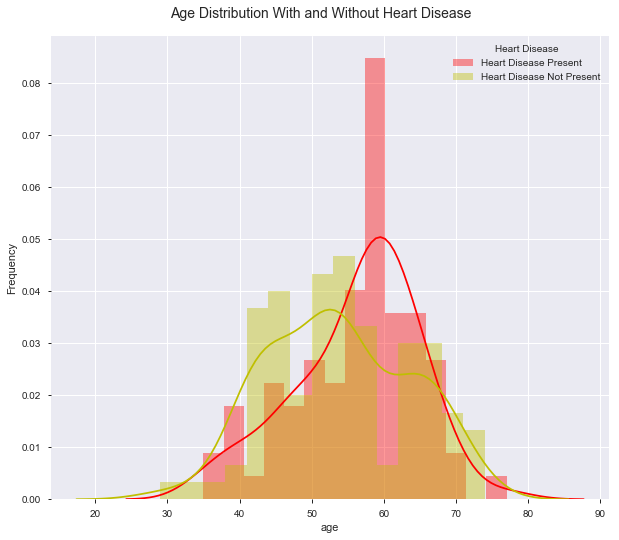

In [18]:
#Histogram
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Age Distribution With and Without Heart Disease", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=train_data, 
                  hue='heart_disease_present', 
                  palette={"Heart Disease Present": "r", "Heart Disease Not Present": "y"})

g.map(sns.distplot, 'age', 
      kde=True, bins=15, ax=ax)

ax.legend(title='Heart Disease')
plt.close(2)

plt.figure()
plt.show()

Looks like the data is somewhat Normally Distributed, across both the cases when Heart Disease is present or not when compared in terms of age. 